\begin{equation}
\dfrac{1}{\pi}\dfrac{a}{2^{4l+5}}  K_{nl}K_{n'l} \int_{-1}^1 d\xi (\xi+1)^{2l} (1-\xi)^{2l+4} C_n^{2l+3/2} (\xi)  C_{n'}^{2l+3/2} (\xi)
\end{equation}

In [4]:
%pylab inline
import scipy.special as special
import scipy.integrate as integrate
from mwlmc_bfe import smooth_coeff

Populating the interactive namespace from numpy and matplotlib


In [14]:
def integrand(xi, n, n_p, l):
    """
    
    """
    factor = (xi+1)**(2*l) * (1-xi)**(2*l+3/2.)
    gegenbauer1 = special.gegenbauer(n, 2*l+3/2.)
    gegenbauer2 = special.gegenbauer(n_p, 2*l+3/2.)
    
    return factor*gegenbauer1(xi)*gegenbauer2(xi)
    
def Knl(n, l):
    return ( 0.5*n*(n+4*l+3) )+( (l+1)*(2*l+1) )

def factors(n, n_p, l, r_s):
    f = 1/np.pi*r_s/2**(4*l+5)
    K_nl = Knl(n, l)
    K_npl = Knl(n_p, l)
    return f*K_nl*K_npl
    
    
def coefficients_sum(S, T, nmax, lmax, r_s):
    """
    
    
    """
    rho2 = 0
    for n_p in range(nmax):
        print(n_p)
        for n in range(nmax):
            for l in range(lmax):
                f = factors(n, n_p, l, r_s)
                I = integrate.quad(integrand, -1, 1, args=(n,n_p,l))[0]
                for m in range(lmax):
                    rho2 += 2*(S[n, l, m]*S[n_p, l, m] + T[n, l, m]*T[n_p, l, m])*(-1)**m * f * I
    return rho2
    


In [50]:
I = np.zeros((10, 10, 10))
for n in range(0, 10):
    for n_p in range(0, 10):
        for l in range(0, 10):
            I[n, n_p, l] = integrate.quad(integrand, -1, 1, args=(n,n_p,l))[0]

In [52]:
I[0][:][0]

array([2.2627417 , 1.12521732, 0.84085236, 0.69923954, 0.61101391,
       0.54940332, 0.50327919, 0.46709007, 0.43771964, 0.41326685])

In [54]:
I[1][:][0]

array([-2.90923933, -1.57530424, -1.20644034, -1.01502514, -0.89302034,
       -0.80657084, -0.74119299, -0.68951392, -0.64733187, -0.61205344])

In [2]:
covmat_mw_path = '../data/MW/MW_ref/mw_reference_BFE_T_V_iterative_1e6_300_covmat_sample_0'
coeff_mw_path =  '../data/MW/MW_ref/mw_reference_BFE_T_V_iterative_1e6_300_coeff_sample_0'
mass = 1.7995383e-05


In [5]:
S_mw, T_mw, N_mw = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 5, 20, 20, 20, 5, mass)


/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:111: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [18]:
coefficients_sum(S_mw, T_mw, 5, 5, 40.85)

46050.22826059356

In [29]:
def rho_square(sn):
    S_mw, T_mw, N_mw = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 5, 20, 20, 20, sn, mass)
    rho2 = coefficients_sum(S_mw, T_mw, 10, 10, 40.85)
    return rho2

In [30]:
sn = np.linspace(0.5, 6, 20)
rho2 = np.zeros(20)
for i in range(len(sn)):
    rho2[i] = rho_square(sn[i])

/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:111: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


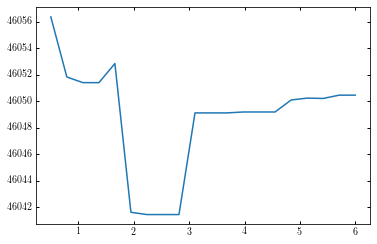

In [28]:
plot(sn, rho2)

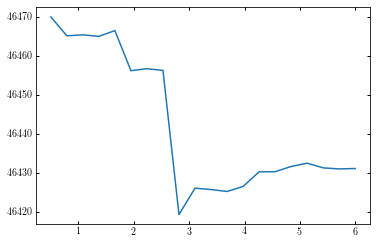

In [32]:
plot(sn, rho2)

In [23]:
rho_square(1)

/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:111: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


46051.413413075024

In [24]:
rho_square(6)

/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:111: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


46050.45172084186